# **Fama French 3 Factor Model: Apple, Amazon & JP Morgan**

In [2]:
# Importing necessary libraries
import pandas_datareader as pd
import matplotlib.pyplot as plt
import pandas as pr

In [3]:
# Use Famafrench to get returns of common risk factor
pd.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [4]:
# Set the starting date
start = '2000-01-01'
# Load the data set from famafrench; Frequency is set to Monthly as daily returns are far too noisy; start date as above
ff = pd.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start = start).read()

/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


In [5]:
# We can see there are two sets of dataset
ff

{0:          Mkt-RF    SMB   HML    RF
 Date                              
 2000-01   -4.74   5.77 -1.88  0.41
 2000-02    2.45  21.36 -9.59  0.43
 2000-03    5.20 -17.20  8.13  0.47
 2000-04   -6.40  -6.68  7.26  0.46
 2000-05   -4.42  -6.05  4.75  0.50
 ...         ...    ...   ...   ...
 2024-03    2.83  -2.51  4.21  0.43
 2024-04   -4.67  -2.39 -0.52  0.47
 2024-05    4.34   0.78 -1.66  0.44
 2024-06    2.77  -3.06 -3.31  0.41
 2024-07    1.24   6.84  5.70  0.45
 
 [295 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2000  -17.60  -4.60  44.98  5.89
 2001  -15.21  18.16  18.52  3.83
 2002  -22.76   4.39   8.09  1.65
 2003   30.75  26.49   4.67  1.02
 2004   10.72   4.45   7.61  1.20
 2005    3.09  -2.36   9.41  2.98
 2006   10.60   0.09  11.93  4.80
 2007    1.04  -7.44 -17.18  4.66
 2008  -38.34   2.40   1.05  1.60
 2009   28.26   9.18  -9.65  0.10
 2010   17.37  14.15  -5.15  0.12
 2011    0.44  -5.73  -8.41  0.04
 2012   16.27  -1.40  1

In [6]:
# We will simply take the first dataset and convert it to a dataframe

data = pr.DataFrame(ff[0])
data.reset_index(inplace = True)
data.head()

,Date,Mkt-RF,SMB,HML,RF
0,2000-01,-4.74,5.77,-1.88,0.41
1,2000-02,2.45,21.36,-9.59,0.43
2,2000-03,5.20,-17.20,8.13,0.47
3,2000-04,-6.40,-6.68,7.26,0.46
4,2000-05,-4.42,-6.05,4.75,0.50


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

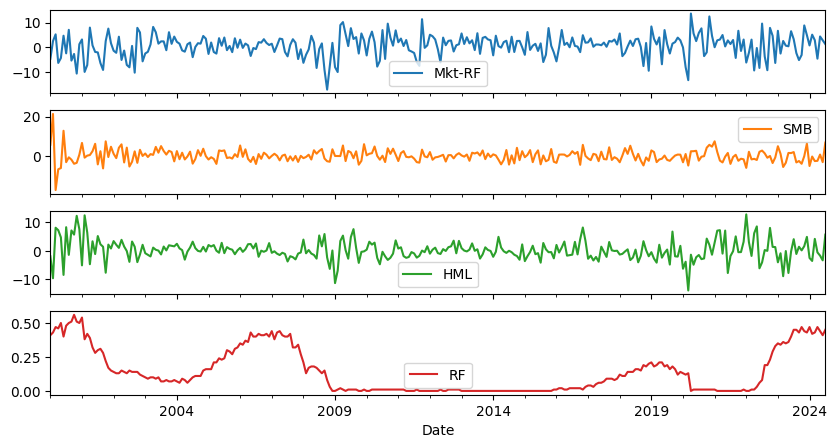

In [7]:
# Let's plot all the various factors to analyze them
data.plot(x = 'Date', subplots = True, figsize = (10,5))

In [8]:
# Now let's covert the Data date type to datetime
data['Date'] = data['Date'].dt.to_timestamp()

In [9]:
import yfinance as yf
AAPL = pr.DataFrame(yf.download('AAPL', start = start, interval = "1mo")["Adj Close"])
AMZN = pr.DataFrame(yf.download('AMZN', start = start, interval = "1mo")["Adj Close"])
JPM = pr.DataFrame(yf.download('JPM', start = start, interval = "1mo")["Adj Close"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
AAPL.reset_index(inplace = True)
AMZN.reset_index(inplace = True)
JPM.reset_index(inplace = True)

In [11]:
# Changing Date type
AAPL['Date'] = pr.to_datetime(AAPL['Date'])
AMZN['Date'] = pr.to_datetime(AMZN['Date'])
JPM['Date'] = pr.to_datetime(JPM['Date'])

In [12]:
# OLS for Apple
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import statsmodels.tools

AAPL["Apple_daily"] = AAPL["Adj Close"].pct_change()*100
AAPL.dropna(axis=0, inplace=True)
AAPL_FF = pr.merge(AAPL, data, on='Date', how = 'inner', sort = True, copy = True, indicator = False, validate = 'one_to_one')
AAPL_FF["Apple_Excess"] = AAPL_FF["Apple_daily"] - AAPL_FF["RF"]
# Add constant to the model
Apple_constant = statsmodels.tools.add_constant(AAPL_FF, prepend = True)
Apple_constant.head()
X = Apple_constant[['const','Mkt-RF', 'SMB', 'HML']]
AAP_model = sm.OLS(Apple_constant["Apple_Excess"],X).fit()
AAP_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Apple_Excess   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     56.94
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           5.71e-29
Time:                        05:36:25   Log-Likelihood:                -1057.2
No. Observations:                 294   AIC:                             2122.
Df Residuals:                     290   BIC:                             2137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8130      0.523      3.464      0.001       0.783       2.843
Mkt-RF         1.3064      0.117     11.128      0.000       1.075       1.537
SMB            0.1293      0.169      0.764      0.446      -0.204       0.463
HML           -0.7664      0.149     -5.130      0.000      -1.060      -0.472
==============================================================================
Omnibus:                       33.526   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.979
Skew:                          -0.108   Prob(JB):                     9.20e-42
Kurtosis:                       6.922   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# OLS for Amazon
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import statsmodels.tools

AMZN["AMZN_daily"] = AMZN["Adj Close"].pct_change()*100
AMZN.dropna(axis=0, inplace=True)
AMZN_FF = pr.merge(AMZN, data, on='Date', how = 'inner', sort = True, copy = True, indicator = False, validate = 'one_to_one')
AMZN_FF["AMZN_Excess"] = AMZN_FF["AMZN_daily"] - AMZN_FF["RF"]
# Add constant to the model
AMZN_constant = statsmodels.tools.add_constant(AMZN_FF, prepend = True)
AMZN_constant.head()
Y = AMZN_constant[['const','Mkt-RF', 'SMB', 'HML']]
AMZN_model = sm.OLS(AMZN_constant["AMZN_Excess"],Y).fit()
AMZN_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AMZN_Excess   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     60.52
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           2.07e-30
Time:                        05:36:25   Log-Likelihood:                -1096.6
No. Observations:                 294   AIC:                             2201.
Df Residuals:                     290   BIC:                             2216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4305      0.598      2.390      0.017       0.253       2.608
Mkt-RF         1.4931      0.134     11.123      0.000       1.229       1.757
SMB           -0.1441      0.194     -0.744      0.457      -0.525       0.237
HML           -1.1919      0.171     -6.978      0.000      -1.528      -0.856
==============================================================================
Omnibus:                       62.871   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.873
Skew:                           0.730   Prob(JB):                     4.28e-74
Kurtosis:                       8.045   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# OLS for JP Morgan
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import statsmodels.tools

JPM["JPM_daily"] = JPM["Adj Close"].pct_change()*100
JPM.dropna(axis=0, inplace=True)
JPM_FF = pr.merge(JPM, data, on='Date', how = 'inner', sort = True, copy = True, indicator = False, validate = 'one_to_one')
JPM_FF["JPM_Excess"] = JPM_FF["JPM_daily"] - JPM_FF["RF"]
# Add constant to the model
JPM_constant = statsmodels.tools.add_constant(JPM_FF, prepend = True)
JPM_constant.head()
Z = JPM_constant[['const','Mkt-RF', 'SMB', 'HML']]
JPM_model = sm.OLS(JPM_constant["JPM_Excess"],Z).fit()
JPM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             JPM_Excess   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     132.4
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           4.82e-54
Time:                        05:36:25   Log-Likelihood:                -919.99
No. Observations:                 294   AIC:                             1848.
Df Residuals:                     290   BIC:                             1863.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.328      0.017      0.987      -0.640       0.651
Mkt-RF         1.2898      0.074     17.521      0.000       1.145       1.435
SMB            0.0603      0.106      0.568      0.571      -0.149       0.269
HML            0.7573      0.094      8.085      0.000       0.573       0.942
==============================================================================
Omnibus:                       40.170   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.383
Skew:                           0.539   Prob(JB):                     6.59e-30
Kurtosis:                       6.132   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

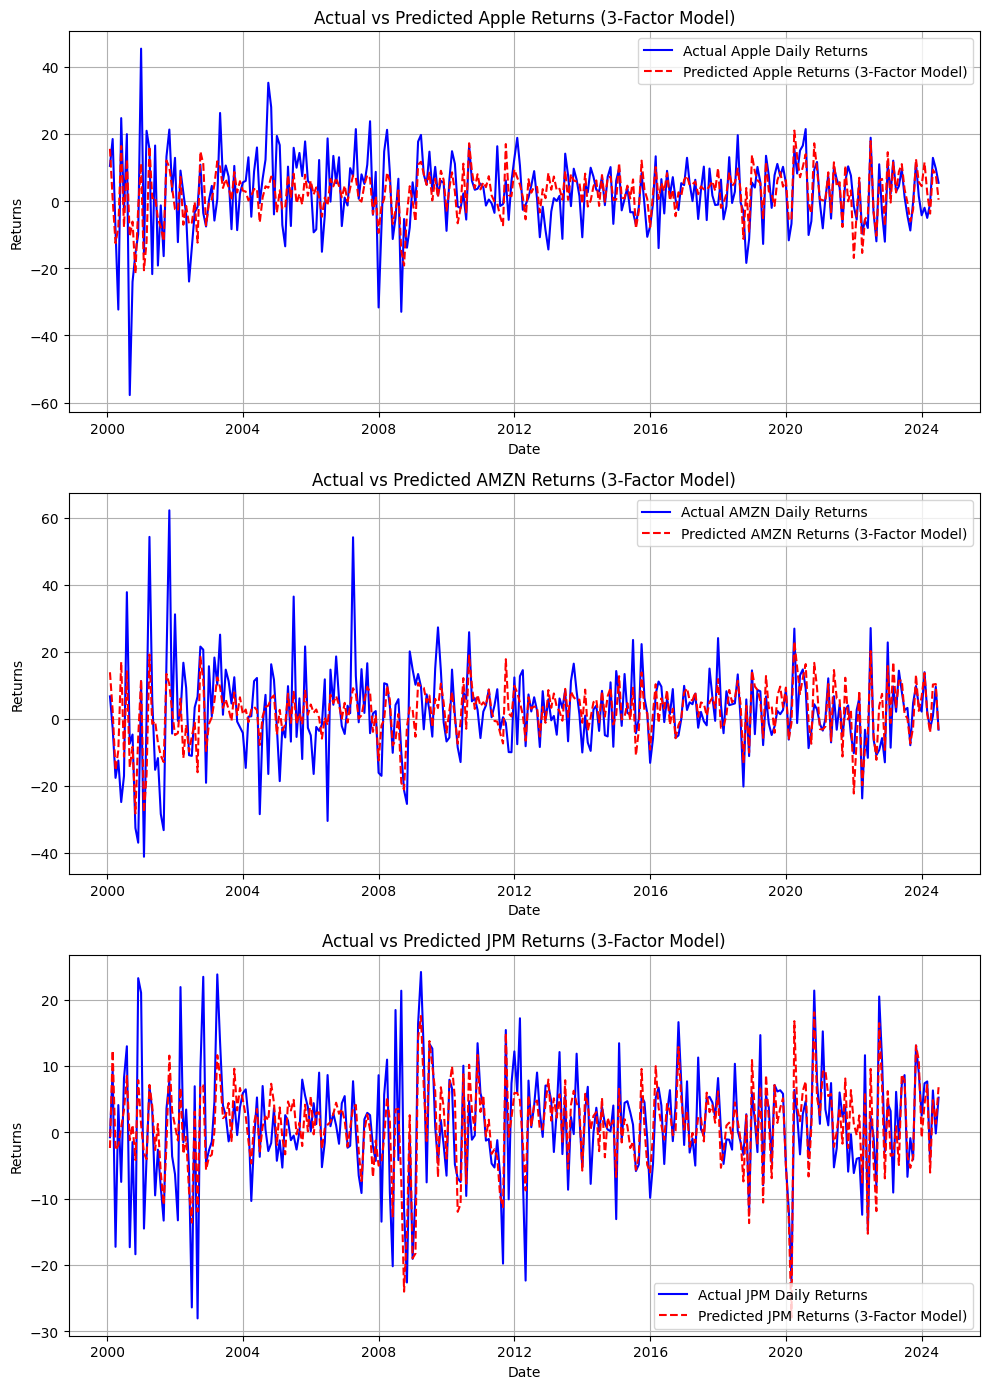

In [15]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10,14))

# Function to plot actual vs predicted returns for a stock
def plot_stock_returns(stock_df, model, stock_name, ax):
    predict_stock = model.predict(X)  # Assuming X is defined correctly for each stock
    predicted_stock = predict_stock + stock_df["RF"]
    ax.plot(stock_df.Date, stock_df[f"{stock_name}_daily"], label=f'Actual {stock_name} Daily Returns', color='blue')
    ax.plot(stock_df.Date, predicted_stock, label=f'Predicted {stock_name} Returns (3-Factor Model)', color='red', linestyle='--')
    ax.set_title(f'Actual vs Predicted {stock_name} Returns (3-Factor Model)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.legend()
    ax.grid(True)

# Plot for Apple
plot_stock_returns(Apple_constant, AAP_model, "Apple", axes[0])

# Plot for Amazon
plot_stock_returns(AMZN_constant, AMZN_model, "AMZN", axes[1])

# Plot for JP Morgan
plot_stock_returns(JPM_constant, JPM_model, "JPM", axes[2])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
